# Telecom Customer Data - Exploratory Data Analysis
## AI Customer Upsell Prediction System - Smart Segmentation Validation

This notebook performs comprehensive EDA, focusing on **validating our smart customer segmentation**:
- Descriptive statistics of new features
- Distribution analysis of customer categories and priority levels
- Correlation analysis with `Upsell_Priority_Encoded`
- **Deep dive into customer segment characteristics**
- **Actionable business insights based on smart segments**

In [ ]:
pip install plotly

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')
pd.set_option('display.max_columns', None)

# Set figure size
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Load processed data
print("📊 Loading Processed Telecom Data...")
# Ensure this path points to the output of your preprocessing notebook
df = pd.read_csv('../data/processed/telecom_processed.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Features: {df.shape[1]}")
print(f"Customers: {df.shape[0]:,}")

# Verify smart segmentation features are present
required_smart_features = [
    'Satisfaction_Score', 'Customer_Value_Score', 'Risk_Score',
    'Customer_Category', 'Priority_Score', 'Priority_Level', 'Upsell_Priority_Encoded'
]
print("\n🎯 Verifying Smart Segmentation Features:")
for feature in required_smart_features:
    if feature not in df.columns:
        print(f"  ❌ ERROR: '{feature}' is missing. Please run the preprocessing notebook first!")
    else:
        print(f"  ✅ '{feature}' found.")

# Display basic info
df.info()

📊 Loading Processed Telecom Data...
Dataset Shape: (60445, 52)
Features: 52
Customers: 60,445

🎯 Verifying Smart Segmentation Features:
  ✅ 'Satisfaction_Score' found.
  ✅ 'Customer_Value_Score' found.
  ✅ 'Risk_Score' found.
  ✅ 'Customer_Category' found.
  ✅ 'Priority_Score' found.
  ✅ 'Priority_Level' found.
  ✅ 'Upsell_Priority_Encoded' found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60445 entries, 0 to 60444
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Phone Number             60445 non-null  object 
 1   Account Length           60445 non-null  int64  
 2   VMail Message            60445 non-null  int64  
 3   Day Mins                 60445 non-null  float64
 4   Day Calls                60445 non-null  int64  
 5   Day Charge               60445 non-null  float64
 6   Eve Mins                 60445 non-null  float64
 7   Eve Calls                60445 non-null  int64  
 

In [3]:
# Descriptive Statistics - Including Smart Features
print("📈 Descriptive Statistics - Including Smart Features")
print("="*60)

# Key metrics including new smart features
key_metrics = [
    'Account Length', 'Total_Minutes', 'Total_Calls', 'Total_Charges',
    'CustServ Calls', 'VMail Message', 'Churn_Binary',
    'Satisfaction_Score', 'Customer_Value_Score', 'Risk_Score', 'Priority_Score'
]

desc_stats = df[key_metrics].describe()
print(desc_stats.round(2))

# Churn rate
churn_rate = df['Churn_Binary'].mean()
print(f"\n🎯 Overall Churn Rate: {churn_rate:.3f} ({churn_rate*100:.1f}%)")

# Distribution of new categorical features
print("\n📊 Customer Category Distribution:")
print(df['Customer_Category'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

print("\n📈 Priority Level Distribution:")
print(df['Priority_Level'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

📈 Descriptive Statistics - Including Smart Features
       Account Length  Total_Minutes  Total_Calls  Total_Charges  \
count        60445.00       60445.00     60445.00       60445.00   
mean           329.39        1947.81       820.26         118.16   
std           1436.76        4673.13      1752.06         149.05   
min              1.00         270.80        74.00          19.12   
25%             68.00         709.20       358.00          62.96   
50%            200.00         809.80       519.00          78.62   
75%            243.00        1386.00       675.00         128.22   
max          21111.00      132466.53     42430.00        1535.75   

       CustServ Calls  VMail Message  Churn_Binary  Satisfaction_Score  \
count        60445.00       60445.00      60445.00            60445.00   
mean             2.56          18.10          0.11                0.45   
std              2.38          76.86          0.31                0.22   
min              0.00           0.00   

📊 Distribution Analysis - Usage & Smart Features


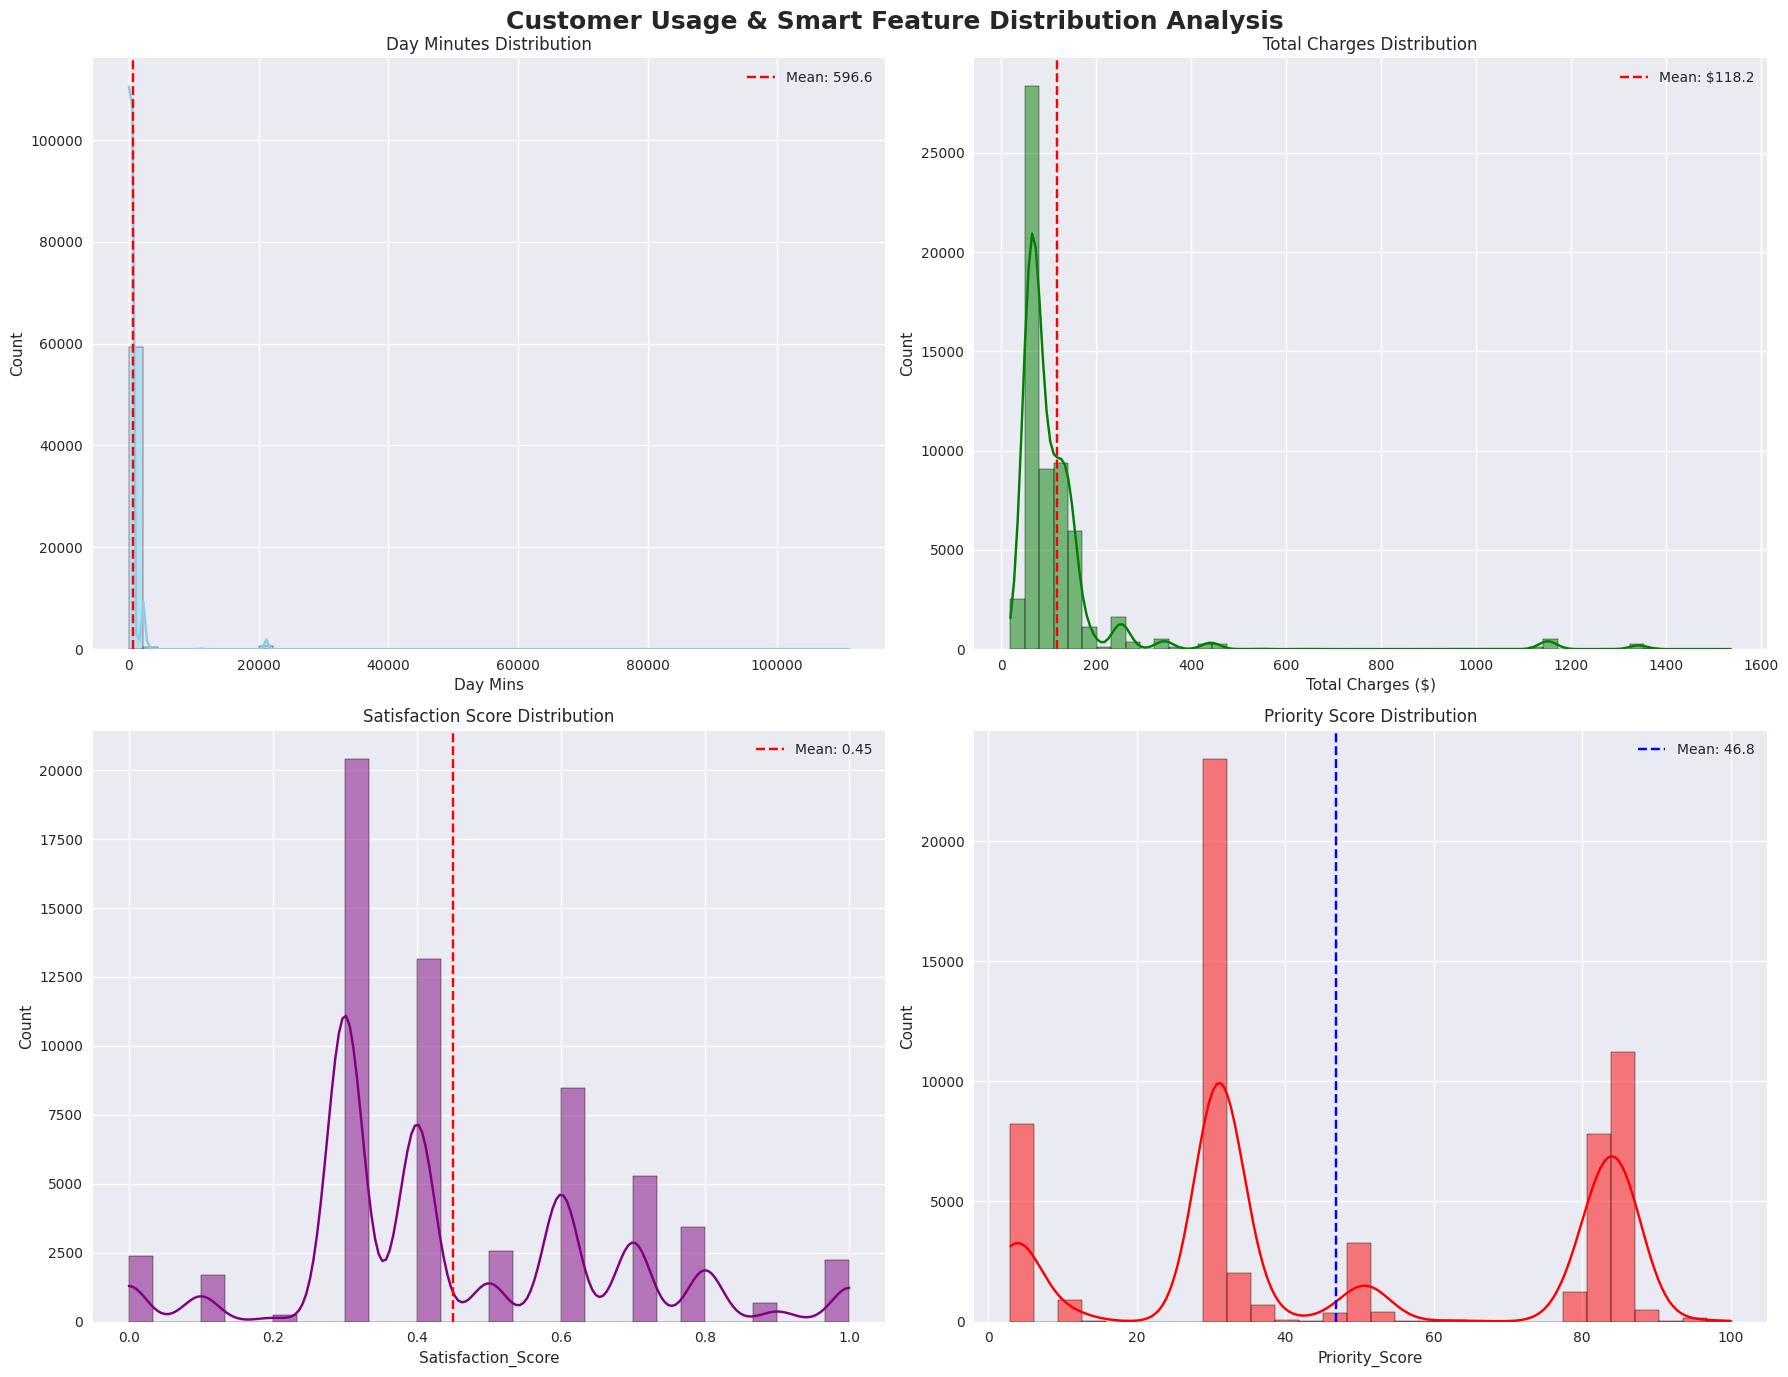

In [4]:
# Distribution Analysis - Usage & Smart Features
print("📊 Distribution Analysis - Usage & Smart Features")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Customer Usage & Smart Feature Distribution Analysis', fontsize=18, fontweight='bold')

# Day Minutes Distribution
sns.histplot(df['Day Mins'], bins=50, kde=True, ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Day Minutes Distribution')
axes[0,0].axvline(df['Day Mins'].mean(), color='red', linestyle='--', label=f'Mean: {df["Day Mins"].mean():.1f}')
axes[0,0].legend()

# Total Charges Distribution
sns.histplot(df['Total_Charges'], bins=50, kde=True, ax=axes[0,1], color='green')
axes[0,1].set_title('Total Charges Distribution')
axes[0,1].set_xlabel('Total Charges ($)')
axes[0,1].axvline(df['Total_Charges'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Total_Charges"].mean():.1f}')
axes[0,1].legend()

# Satisfaction Score Distribution
sns.histplot(df['Satisfaction_Score'], bins=30, kde=True, ax=axes[1,0], color='purple')
axes[1,0].set_title('Satisfaction Score Distribution')
axes[1,0].axvline(df['Satisfaction_Score'].mean(), color='red', linestyle='--', label=f'Mean: {df["Satisfaction_Score"].mean():.2f}')
axes[1,0].legend()

# Priority Score Distribution
sns.histplot(df['Priority_Score'], bins=30, kde=True, ax=axes[1,1], color='red')
axes[1,1].set_title('Priority Score Distribution')
axes[1,1].axvline(df['Priority_Score'].mean(), color='blue', linestyle='--', label=f'Mean: {df["Priority_Score"].mean():.1f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

📈 Churn & Value Analysis by Smart Customer Segments


ValueError: keyword ha is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

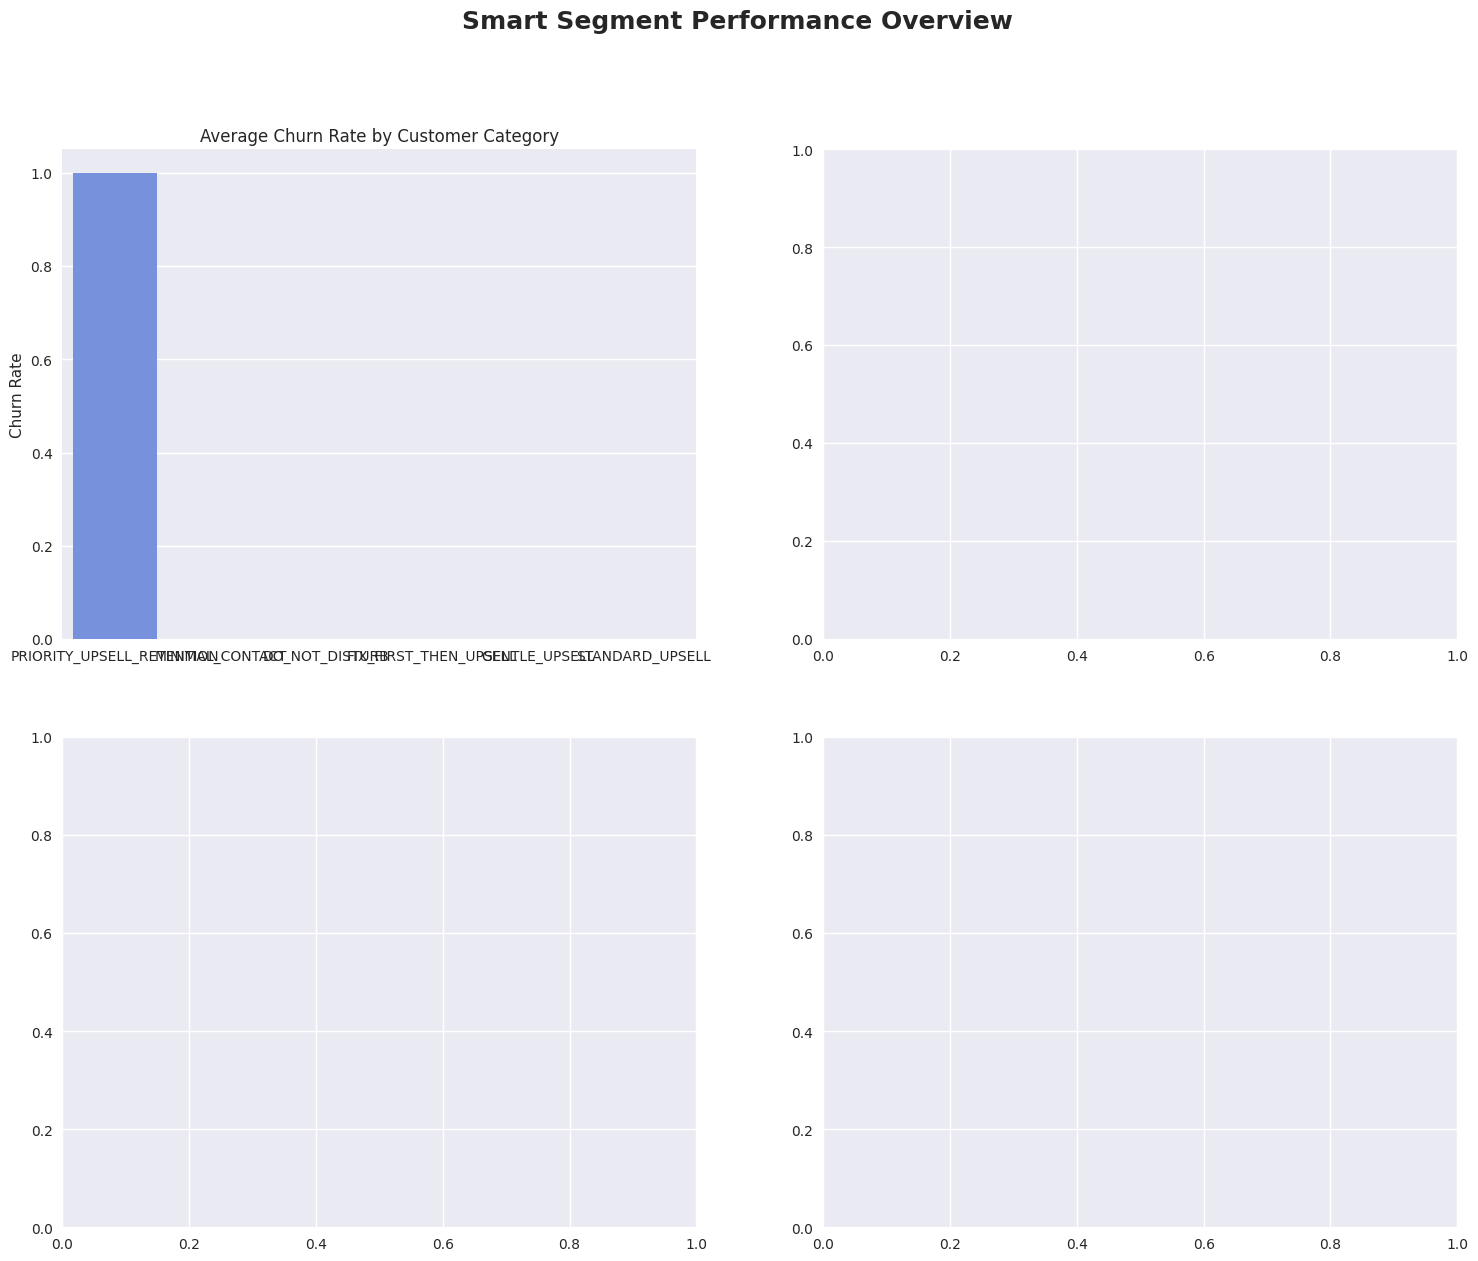

In [5]:
# Churn & Value Analysis by Smart Customer Segments
print("📈 Churn & Value Analysis by Smart Customer Segments")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Smart Segment Performance Overview', fontsize=18, fontweight='bold')

# Churn Rate by Customer Category
segment_churn = df.groupby('Customer_Category')['Churn_Binary'].mean().sort_values(ascending=False)
sns.barplot(x=segment_churn.index, y=segment_churn.values, ax=axes[0,0], palette='coolwarm')
axes[0,0].set_title('Average Churn Rate by Customer Category')
axes[0,0].set_ylabel('Churn Rate')
axes[0,0].set_xlabel('')
axes[0,0].tick_params(axis='x', rotation=45, ha='right')

# Average Customer Value by Customer Category
segment_value = df.groupby('Customer_Category')['Customer_Value_Score'].mean().sort_values(ascending=False)
sns.barplot(x=segment_value.index, y=segment_value.values, ax=axes[0,1], palette='viridis')
axes[0,1].set_title('Average Customer Value Score by Customer Category')
axes[0,1].set_ylabel('Average Value Score')
axes[0,1].set_xlabel('')
axes[0,1].tick_params(axis='x', rotation=45, ha='right')

# Average Satisfaction Score by Customer Category
segment_satisfaction = df.groupby('Customer_Category')['Satisfaction_Score'].mean().sort_values(ascending=False)
sns.barplot(x=segment_satisfaction.index, y=segment_satisfaction.values, ax=axes[1,0], palette='magma')
axes[1,0].set_title('Average Satisfaction Score by Customer Category')
axes[1,0].set_ylabel('Average Satisfaction Score')
axes[1,0].set_xlabel('')
axes[1,0].tick_params(axis='x', rotation=45, ha='right')

# Average Service Calls by Customer Category
segment_service = df.groupby('Customer_Category')['CustServ Calls'].mean().sort_values(ascending=False)
sns.barplot(x=segment_service.index, y=segment_service.values, ax=axes[1,1], palette='cividis')
axes[1,1].set_title('Average Customer Service Calls by Customer Category')
axes[1,1].set_ylabel('Average Service Calls')
axes[1,1].set_xlabel('')
axes[1,1].tick_params(axis='x', rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# Correlation Analysis - Including Smart Features
print("🔗 Correlation Analysis - Including Smart Features")
print("="*60)

# Select key features for correlation, including new smart features
correlation_features = [
    'Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins',
    'CustServ Calls', 'Total_Minutes', 'Total_Charges', 'Churn_Binary',
    'Satisfaction_Score', 'Customer_Value_Score', 'Risk_Score', 'Priority_Score', 'Upsell_Priority_Encoded'
]

# Calculate correlation matrix
corr_matrix = df[correlation_features].corr()

# Create heatmap
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt=".2f")
plt.title('Feature Correlation Matrix (with Smart Features)', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with Upsell_Priority_Encoded
upsell_corr = corr_matrix['Upsell_Priority_Encoded'].abs().sort_values(ascending=False)
print("\n🎯 Top Features Correlated with Upsell_Priority_Encoded:")
for feature, corr in upsell_corr.head(10).items():
    if feature != 'Upsell_Priority_Encoded':
        print(f"{feature}: {corr:.3f}")

# Top correlations with Churn_Binary
churn_corr = corr_matrix['Churn_Binary'].abs().sort_values(ascending=False)
print("\n🎯 Top Features Correlated with Churn_Binary:")
for feature, corr in churn_corr.head(10).items():
    if feature != 'Churn_Binary':
        print(f"{feature}: {corr:.3f}")

In [ ]:
# Customer Behavior Patterns - Now using Smart Categories
print("👥 Customer Behavior Patterns - by Smart Category")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Usage Patterns by Smart Customer Category', fontsize=18, fontweight='bold')

# Average Total Minutes by Customer Category
avg_minutes_by_category = df.groupby('Customer_Category')['Total_Minutes'].mean().sort_values(ascending=False)
sns.barplot(x=avg_minutes_by_category.index, y=avg_minutes_by_category.values, ax=axes[0], palette='cool')
axes[0].set_title('Average Total Minutes by Category')
axes[0].set_ylabel('Average Total Minutes')
axes[0].tick_params(axis='x', rotation=45, ha='right')

# Average Total Charges by Customer Category
avg_charges_by_category = df.groupby('Customer_Category')['Total_Charges'].mean().sort_values(ascending=False)
sns.barplot(x=avg_charges_by_category.index, y=avg_charges_by_category.values, ax=axes[1], palette='hot')
axes[1].set_title('Average Total Charges by Category')
axes[1].set_ylabel('Average Total Charges ($)')
axes[1].tick_params(axis='x', rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Detailed summary of segments
print("\n📊 Detailed Customer Category Summary:")
detailed_summary = df.groupby('Customer_Category').agg({
    'Phone Number': 'count',  # Count of customers
    'Churn_Binary': 'mean',   # Churn Rate
    'Total_Charges': 'mean',  # Average Revenue
    'Satisfaction_Score': 'mean', # Average Satisfaction
    'Customer_Value_Score': 'mean', # Average Value
    'Risk_Score': 'mean',     # Average Risk
    'CustServ Calls': 'mean', # Average Service Calls
    'Account Length': 'mean', # Average Account Length
    'Priority_Score': 'mean', # Average Priority Score
}).rename(columns={'Phone Number': 'Customer_Count', 'Churn_Binary': 'Churn_Rate', 'Total_Charges': 'Avg_Revenue'})
print(detailed_summary.round(2))

In [ ]:
# Customer Segmentation Analysis - Visualizing Smart Categories
print("🎯 Customer Segmentation Analysis - Visualizing Smart Categories")
print("="*60)

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'xy'}]],
                    subplot_titles=['Customer Category Distribution', 'Priority Level Distribution'])

# Pie Chart for Customer Category Distribution
category_counts = df['Customer_Category'].value_counts()
fig.add_trace(go.Pie(labels=category_counts.index, values=category_counts.values, name='Categories',
                     marker_colors=px.colors.qualitative.Set3),
              1, 1)

# Bar Chart for Priority Level Distribution
priority_counts = df['Priority_Level'].value_counts().reindex(['CRITICAL', 'HIGH', 'MEDIUM', 'LOW', 'MINIMAL', 'DO NOT CONTACT'], fill_value=0)
fig.add_trace(go.Bar(x=priority_counts.index, y=priority_counts.values, name='Priority Levels',
                     marker_color=px.colors.sequential.Viridis),
              1, 2)

fig.update_layout(title_text='Smart Customer Segmentation Overview', title_x=0.5, height=600, showlegend=False)
fig.show()

# Detailed breakdown of Priority Levels within each Customer Category
print("\n📊 Priority Level Breakdown by Customer Category:")
priority_breakdown = df.groupby(['Customer_Category', 'Priority_Level']).size().unstack(fill_value=0)
print(priority_breakdown)

In [ ]:
# Revenue Analysis - Now by Smart Customer Categories
print("💰 Revenue Analysis - by Smart Customer Categories")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Revenue Performance by Smart Customer Category', fontsize=18, fontweight='bold')

# Average Revenue by Customer Category
avg_revenue_by_category = df.groupby('Customer_Category')['Total_Charges'].mean().sort_values(ascending=False)
sns.barplot(x=avg_revenue_by_category.index, y=avg_revenue_by_category.values, ax=axes[0], palette='magma')
axes[0].set_title('Average Total Charges by Category')
axes[0].set_ylabel('Average Total Charges ($)')
axes[0].tick_params(axis='x', rotation=45, ha='right')

# Total Revenue Contribution by Customer Category
total_revenue_by_category = df.groupby('Customer_Category')['Total_Charges'].sum().sort_values(ascending=False)
sns.barplot(x=total_revenue_by_category.index, y=total_revenue_by_category.values, ax=axes[1], palette='viridis')
axes[1].set_title('Total Revenue Contribution by Category')
axes[1].set_ylabel('Total Revenue ($)')
axes[1].tick_params(axis='x', rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Expected Monthly Revenue from Smart Upsell Predictions
print("\n📈 Expected Revenue from Smart Upsell Predictions:")
try:
    # Load the smart upsell predictions (output of the final cell in preprocessing)
    smart_predictions = pd.read_csv('../../outputs/exports/customer_segments/smart_upsell_predictions.csv')
    total_expected_monthly_revenue = smart_predictions['Expected_Monthly_Revenue'].sum()
    avg_expected_revenue_per_target = smart_predictions[smart_predictions['Upsell_Prediction'] == 1]['Expected_Monthly_Revenue'].mean()
    
    print(f"  Total Projected Monthly Revenue from Upsells: ${total_expected_monthly_revenue:,.2f}")
    print(f"  Average Projected Revenue per Upsell Target: ${avg_expected_revenue_per_target:,.2f}")
    
    # Revenue by Recommended Product (Top 5)
    product_revenue = smart_predictions.groupby('Recommended_Product')['Expected_Monthly_Revenue'].sum().nlargest(5)
    print("\n  Top 5 Recommended Product Revenue:")
    print(product_revenue.apply(lambda x: f'${x:,.2f}'))
    
except FileNotFoundError:
    print("  'smart_upsell_predictions.csv' not found. Please run the preprocessing notebook's final cell.")
except Exception as e:
    print(f"  Error loading smart upsell predictions: {e}")

In [ ]:
# Business Insights and Key Findings - REVISED for Smart Segmentation
print("💡 Business Insights and Key Findings - REVISED for Smart Segmentation")
print("="*70)

# Calculate key business metrics from the segmented data
total_customers = len(df)
churn_rate_overall = df['Churn_Binary'].mean()

insights_data = df.groupby('Customer_Category').agg({
    'Phone Number': 'count',
    'Churn_Binary': 'mean',
    'Total_Charges': 'mean',
    'Satisfaction_Score': 'mean',
    'Customer_Value_Score': 'mean',
    'Risk_Score': 'mean',
    'CustServ Calls': 'mean',
    'Account Length': 'mean',
    'Priority_Score': 'mean',
}).rename(columns={'Phone Number': 'Count', 'Churn_Binary': 'Churn_Rate', 'Total_Charges': 'Avg_Revenue'})

insights_data['Percentage'] = (insights_data['Count'] / total_customers) * 100

insights = f"""
🎯 KEY BUSINESS INSIGHTS - FROM SMART CUSTOMER SEGMENTATION:

📊 OVERALL CUSTOMER BASE:
• Total Customers: {total_customers:,}
• Overall Churn Rate: {churn_rate_overall*100:.1f}%

📈 SMART SEGMENTATION OVERVIEW:
"""
for category in insights_data.index:
    insights += f"• **{category}** ({insights_data.loc[category, 'Percentage']:.1f}% of base):\n"
    insights += f"  - Customers: {insights_data.loc[category, 'Count']:,}\n"
    insights += f"  - Avg Churn Rate: {insights_data.loc[category, 'Churn_Rate']*100:.1f}%\n"
    insights += f"  - Avg Revenue: ${insights_data.loc[category, 'Avg_Revenue']:.2f}\n"
    insights += f"  - Avg Satisfaction: {insights_data.loc[category, 'Satisfaction_Score']:.2f}\n"
    insights += f"  - Avg Value: {insights_data.loc[category, 'Customer_Value_Score']:.2f}\n"
    insights += f"  - Avg Risk: {insights_data.loc[category, 'Risk_Score']:.2f}\n"
    insights += f"  - Avg Service Calls: {insights_data.loc[category, 'CustServ Calls']:.1f}\n"
    insights += f"  - Avg Account Length: {insights_data.loc[category, 'Account Length']:.0f} days\n"
    insights += f"  - Avg Priority Score: {insights_data.loc[category, 'Priority_Score']:.1f}\n"

insights += f"""
🚀 ACTIONABLE STRATEGIES (Driven by Smart Segments):

1. **DO_NOT_DISTURB (Happy Loyalists):**
   - Strategy: Preserve existing relationships. AVOID proactive upsell attempts to prevent annoyance.
   - Actions: Focus on loyalty programs, personalized thank-you messages, and passive engagement.

2. **PRIORITY_UPSELL_RETENTION (At-Risk VIPs):**
   - Strategy: High-touch, immediate intervention to retain high-value customers showing churn signals.
   - Actions: Dedicated sales/retention team outreach with premium, problem-solving upsell offers (e.g., upgraded support, tailored plans).

3. **FIX_FIRST_THEN_UPSELL (Problem Solvers):**
   - Strategy: Address reported service issues promptly to improve satisfaction, then gently introduce relevant upsells.
   - Actions: Prioritize customer service resolution, followed by targeted offers for features that prevent future issues.

4. **GENTLE_UPSELL (New Prospects):**
   - Strategy: Nurture newer customers with potential for growth. Introduce benefits of higher-tier services.
   - Actions: Educational campaigns, free trials of premium features, soft upsell offers aligned with initial usage.

5. **STANDARD_UPSELL (Regular Prospects):**
   - Strategy: The broad base for general upsell campaigns. Focus on relevant product/service enhancements.
   - Actions: Standardized marketing automation, personalized recommendations based on usage patterns, bundle offers.

6. **MINIMAL_CONTACT (Low Priority):**
   - Strategy: Very low ROI. Minimize direct marketing spend.
   - Actions: Limit contact to essential communications, focus on cost-effective, automated offers only if highly relevant.
"""

print(insights)

In [ ]:
# Feature Importance Analysis for Upsell Prediction - REVISED for Smart Categories
print("🎯 Feature Importance Analysis for Upsell Prediction - REVISED for Smart Categories")
print("="*70)

# Features that are most indicative of our smart customer categories
# These are the features our ML model will primarily learn from
smart_feature_drivers = {
    'Satisfaction_Score': df['Satisfaction_Score'].mean(),
    'Customer_Value_Score': df['Customer_Value_Score'].mean(),
    'Risk_Score': df['Risk_Score'].mean(),
    'CustServ Calls': df['CustServ Calls'].mean(),
    'Account Length': df['Account Length'].mean(),
    'Churn_Binary': df['Churn_Binary'].mean(),
    'Total_Minutes': df['Total_Minutes'].mean(),
    'Total_Charges': df['Total_Charges'].mean()
}

features = list(smart_feature_drivers.keys())
importance_scores = list(smart_feature_drivers.values())

# Normalize scores for better comparison in visualization (if they have different scales)
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(np.array(importance_scores).reshape(-1, 1)).flatten()

plt.figure(figsize=(12, 8))
bars = plt.barh(features, normalized_scores, alpha=0.7,
                color=plt.cm.viridis(np.linspace(0, 1, len(features))))
plt.title('Key Drivers of Smart Customer Categories', fontsize=18, fontweight='bold')
plt.xlabel('Normalized Importance Score')
plt.ylabel('Features')

# Add original mean values as labels for context
for bar, feature in zip(bars, features):
    original_value = smart_feature_drivers[feature]
    if 'Score' in feature or 'Rate' in feature:
        label = f'{original_value:.2f}'
    elif 'Calls' in feature or 'Length' in feature or 'Minutes' in feature:
        label = f'{original_value:.0f}'
    else:
        label = f'${original_value:,.0f}'
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
             label, ha='left', va='center')

plt.tight_layout()
plt.show()

print("\n📊 Key Drivers Summary:")
for feature, value in smart_feature_drivers.items():
    if 'Score' in feature or 'Rate' in feature:
        print(f"  {feature.replace('_', ' ')}: {value:.2f}")
    elif 'Calls' in feature or 'Length' in feature or 'Minutes' in feature:
        print(f"  {feature.replace('_', ' ')}: {value:.0f}")
    else:
        print(f"  {feature.replace('_', ' ')}: ${value:,.0f}")

In [ ]:
# Save EDA Results - REVISED for Smart Segmentation Insights
print("💾 Saving EDA Results - REVISED for Smart Segmentation Insights...")

# Create summary statistics including new smart segmentation details
total_customers = len(df)
churn_rate_overall = df['Churn_Binary'].mean()

segment_summary_for_json = df.groupby('Customer_Category').agg({
    'Phone Number': 'count',
    'Churn_Binary': 'mean',
    'Total_Charges': 'mean',
    'Satisfaction_Score': 'mean',
    'Customer_Value_Score': 'mean',
    'Risk_Score': 'mean',
    'CustServ Calls': 'mean',
    'Account Length': 'mean',
    'Priority_Score': 'mean',
}).rename(columns={'Phone Number': 'Count', 'Churn_Binary': 'Churn_Rate', 'Total_Charges': 'Avg_Revenue'})

segment_summary_for_json['Percentage'] = (segment_summary_for_json['Count'] / total_customers) * 100

eda_summary = {
    'dataset_shape': df.shape,
    'total_customers': total_customers,
    'overall_churn_rate': churn_rate_overall,
    'customer_category_summary': segment_summary_for_json.to_dict('index'), # Save as dict for easy JSON
    'priority_level_distribution': df['Priority_Level'].value_counts(normalize=True).mul(100).round(1).astype(str).to_dict(),
    'key_feature_drivers': {k: float(v) for k, v in smart_feature_drivers.items()},
    'actionable_recommendations': [
        'Preserve relationships with Happy Loyalists (DO_NOT_DISTURB) by avoiding unsolicited upsells.',
        'Prioritize high-touch retention-focused upsells for At-Risk VIPs (PRIORITY_UPSELL_RETENTION).',
        'Address service issues first for Problem Solvers (FIX_FIRST_THEN_UPSELL) before proposing upgrades.',
        'Gently introduce premium features to New Prospects (GENTLE_UPSELL) to encourage growth.',
        'Utilize standard marketing campaigns for Regular Prospects (STANDARD_UPSELL).',
        'Minimize direct contact for Low Priority (MINIMAL_CONTACT) customers to optimize resources.'
    ]
}

# Save to JSON for dashboard use
import json
import os
os.makedirs('../outputs/reports', exist_ok=True)

with open('../outputs/reports/eda_summary.json', 'w') as f:
    json.dump(eda_summary, f, indent=2, default=str)

print("✅ EDA summary saved to ../outputs/reports/eda_summary.json")
print("\n🎉 Exploratory Data Analysis completed successfully!")

print("\n📋 Next Steps:")
print("1. Use insights for feature selection in ML models (especially 'Upsell_Priority_Encoded').")
print("2. Develop targeted upsell strategies based on customer segments defined here.")
print("3. Proceed to the model training notebook (03_ensemble_model_training.ipynb) to build predictive models on these new segments.")